### Importing the necessary Libraries

In [3]:
import pandas as pd
import numpy as np

import tweepy
import requests
import os
import time
import json

import matplotlib.pyplot as plt
%matplotlib inline

#### 1-Reading the twitter_archive_enhanced.csv using pandas.read_csv() function

In [17]:
twitter_arch = pd.read_csv('twitter-archive-enhanced-2.csv')
#checking for the dataframe info
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### 2-Getting the image predictions tsv file by using requests library and saving it, and use Pandas to the read the csv file as data frame

In [6]:
# The url of the image Prediction data 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

#using requests library to get the data from url
response = requests.get(url)
with open (url.split('/')[-1] ,'wb') as file :
    file.write(response.content)

In [7]:
#reading the image-prediction data using tab as seperator
image_predictions = pd.read_csv('image-predictions.tsv',sep='\t')
#display the the summary of image_predictions using info() function
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### 3- Importing Json data from Twitter using Tweepy api

In [8]:
#different keys required for the twitter api
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

#we will set the wait_on_rate_limit to True to wait for rate limits to replenish
api = tweepy.API(auth,wait_on_rate_limit = True , wait_on_rate_limit_notify= True)

test the api to get one tweet_id information

In [9]:
#getting a sample tweet data using api.get_status()
exp_tweet = api.get_status(twitter_archive.tweet_id[1] ,wait_on_rate_limit=True,  wait_on_rate_limit_notify=True, tweet_mode = 'extended')
content = exp_tweet._json
#print the json content of the tweet sample
print(content)

{'created_at': 'Wed Jun 29 01:23:16 +0000 2016', 'id': 747963614829678593, 'id_str': '747963614829678593', 'full_text': 'PUPPER NOOOOO BEHIND YOUUU 10/10 pls keep this pupper in your thoughts https://t.co/ZPfeRtOX0Q', 'truncated': False, 'display_text_range': [0, 70], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 747963600220917761, 'id_str': '747963600220917761', 'indices': [71, 94], 'media_url': 'http://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg', 'url': 'https://t.co/ZPfeRtOX0Q', 'display_url': 'pic.twitter.com/ZPfeRtOX0Q', 'expanded_url': 'https://twitter.com/dog_rates/status/747963614829678593/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 937, 'h': 632, 'resize': 'fit'}, 'small': {'w': 680, 'h': 459, 'resize': 'fit'}, 'large': {'w': 937, 'h': 632, 'resize': 'fit'}}}]}, 'extended_entities': {'media': [{'id': 74796

In [10]:
#Checking the keys of the test tweet
content['retweet_count'],content['user']['followers_count'],content['favorite_count']

(2029, 9004968, 5555)

Query the json Data from the Api into tweet_json.txt file, setting wait_on_rate_limit to True to wait for rate limits to replenish

In [11]:
errors = []

if not os.path.isfile('tweet_json.txt'):
    with open('tweet_json.txt' ,'w') as file:

        #save the start time before Quering to make code timer
        start_time = time.time()
        for tweet_id in twitter_archive['tweet_id']:
            try :
                tweet = api.get_status(tweet_id, wait_on_rate_limit=True,  wait_on_rate_limit_notify=True,tweet_mode= 'extended')
                json.dump(tweet._json,file)
                file.write('\n')
                
            except Exception as e:
                print("Error on tweet id {}".format(tweet_id) + ";" + str(e))
                errors.append(tweet_id)
                
            #print each tweet id and time elapsed    
            print('The tweet id is :' , tweet_id)
      
        #print time elapsed to query all the data
        print('time elapsed ' , time.time() - start_time)


The tweet id is : 892420643555336193
The tweet id is : 892177421306343426
The tweet id is : 891815181378084864
The tweet id is : 891689557279858688
The tweet id is : 891327558926688256
The tweet id is : 891087950875897856
The tweet id is : 890971913173991426
The tweet id is : 890729181411237888
The tweet id is : 890609185150312448
The tweet id is : 890240255349198849
The tweet id is : 890006608113172480
The tweet id is : 889880896479866881
The tweet id is : 889665388333682689
The tweet id is : 889638837579907072
The tweet id is : 889531135344209921
The tweet id is : 889278841981685760
The tweet id is : 888917238123831296
The tweet id is : 888804989199671297
The tweet id is : 888554962724278272
Error on tweet id 888202515573088257;[{'code': 144, 'message': 'No status found with that ID.'}]
The tweet id is : 888202515573088257
The tweet id is : 888078434458587136
The tweet id is : 887705289381826560
The tweet id is : 887517139158093824
The tweet id is : 887473957103951883
The tweet id is

The tweet id is : 855459453768019968
The tweet id is : 855245323840757760
The tweet id is : 855138241867124737
The tweet id is : 854732716440526848
The tweet id is : 854482394044301312
The tweet id is : 854365224396361728
The tweet id is : 854120357044912130
The tweet id is : 854010172552949760
The tweet id is : 853760880890318849
The tweet id is : 853639147608842240
The tweet id is : 853299958564483072
The tweet id is : 852936405516943360
The tweet id is : 852912242202992640
The tweet id is : 852672615818899456
The tweet id is : 852553447878664193
The tweet id is : 852311364735569921
The tweet id is : 852226086759018497
The tweet id is : 852189679701164033
Error on tweet id 851953902622658560;[{'code': 144, 'message': 'No status found with that ID.'}]
The tweet id is : 851953902622658560
The tweet id is : 851861385021730816
The tweet id is : 851591660324737024
The tweet id is : 851464819735769094
The tweet id is : 851224888060895234
The tweet id is : 850753642995093505
The tweet id is

The tweet id is : 825829644528148480
The tweet id is : 825535076884762624
The tweet id is : 825147591692263424
The tweet id is : 825120256414846976
The tweet id is : 825026590719483904
The tweet id is : 824796380199809024
The tweet id is : 824775126675836928
The tweet id is : 824663926340194305
The tweet id is : 824325613288833024
The tweet id is : 824297048279236611
The tweet id is : 824025158776213504
The tweet id is : 823939628516474880
The tweet id is : 823719002937630720
The tweet id is : 823699002998870016
The tweet id is : 823581115634085888
The tweet id is : 823333489516937216
The tweet id is : 823322678127919110
The tweet id is : 823269594223824897
The tweet id is : 822975315408461824
The tweet id is : 822872901745569793
The tweet id is : 822859134160621569
The tweet id is : 822647212903690241
The tweet id is : 822610361945911296
The tweet id is : 822489057087389700
The tweet id is : 822462944365645825
The tweet id is : 822244816520155136
The tweet id is : 822163064745328640
T

The tweet id is : 798628517273620480
The tweet id is : 798585098161549313
The tweet id is : 798576900688019456
The tweet id is : 798340744599797760
The tweet id is : 798209839306514432
The tweet id is : 797971864723324932
The tweet id is : 797545162159308800
The tweet id is : 797236660651966464
The tweet id is : 797165961484890113
The tweet id is : 796904159865868288
The tweet id is : 796865951799083009
The tweet id is : 796759840936919040
The tweet id is : 796563435802726400
The tweet id is : 796484825502875648
The tweet id is : 796387464403357696
The tweet id is : 796177847564038144
The tweet id is : 796149749086875649
The tweet id is : 796125600683540480
The tweet id is : 796116448414461957
The tweet id is : 796080075804475393
The tweet id is : 796031486298386433
The tweet id is : 795464331001561088
The tweet id is : 795400264262053889
The tweet id is : 795076730285391872
The tweet id is : 794983741416415232
The tweet id is : 794926597468000259
The tweet id is : 794355576146903043
T

The tweet id is : 770772759874076672
Error on tweet id 770743923962707968;[{'code': 144, 'message': 'No status found with that ID.'}]
The tweet id is : 770743923962707968
The tweet id is : 770655142660169732
The tweet id is : 770414278348247044
The tweet id is : 770293558247038976
The tweet id is : 770093767776997377
The tweet id is : 770069151037685760
The tweet id is : 769940425801170949
The tweet id is : 769695466921623552
The tweet id is : 769335591808995329
The tweet id is : 769212283578875904
The tweet id is : 768970937022709760
The tweet id is : 768909767477751808
The tweet id is : 768855141948723200
The tweet id is : 768609597686943744
The tweet id is : 768596291618299904
The tweet id is : 768554158521745409
The tweet id is : 768473857036525572
The tweet id is : 768193404517830656
The tweet id is : 767884188863397888
The tweet id is : 767754930266464257
The tweet id is : 767500508068192258
The tweet id is : 767191397493538821
The tweet id is : 767122157629476866
The tweet id is

Rate limit reached. Sleeping for: 210


The tweet id is : 758355060040593408
The tweet id is : 758099635764359168
The tweet id is : 758041019896193024
The tweet id is : 757741869644341248
The tweet id is : 757729163776290825
The tweet id is : 757725642876129280
The tweet id is : 757611664640446465
Error on tweet id 757597904299253760;[{'code': 179, 'message': 'Sorry, you are not authorized to see this status.'}]
The tweet id is : 757597904299253760
The tweet id is : 757596066325864448
The tweet id is : 757400162377592832
The tweet id is : 757393109802180609
The tweet id is : 757354760399941633
The tweet id is : 756998049151549440
The tweet id is : 756939218950160384
The tweet id is : 756651752796094464
The tweet id is : 756526248105566208
The tweet id is : 756303284449767430
The tweet id is : 756288534030475264
The tweet id is : 756275833623502848
The tweet id is : 755955933503782912
The tweet id is : 755206590534418437
The tweet id is : 755110668769038337
The tweet id is : 754874841593970688
The tweet id is : 75485658396907

The tweet id is : 733109485275860992
The tweet id is : 732732193018155009
The tweet id is : 732726085725589504
The tweet id is : 732585889486888962
The tweet id is : 732375214819057664
The tweet id is : 732005617171337216
The tweet id is : 731285275100512256
The tweet id is : 731156023742988288
The tweet id is : 730924654643314689
The tweet id is : 730573383004487680
The tweet id is : 730427201120833536
The tweet id is : 730211855403241472
The tweet id is : 730196704625098752
The tweet id is : 729854734790754305
The tweet id is : 729838605770891264
The tweet id is : 729823566028484608
The tweet id is : 729463711119904772
The tweet id is : 729113531270991872
The tweet id is : 728986383096946689
The tweet id is : 728760639972315136
The tweet id is : 728751179681943552
The tweet id is : 728653952833728512
The tweet id is : 728409960103686147
The tweet id is : 728387165835677696
The tweet id is : 728046963732717569
The tweet id is : 728035342121635841
The tweet id is : 728015554473250816
T

The tweet id is : 705591895322394625
The tweet id is : 705475953783398401
The tweet id is : 705442520700944385
The tweet id is : 705428427625635840
The tweet id is : 705239209544720384
The tweet id is : 705223444686888960
The tweet id is : 705102439679201280
The tweet id is : 705066031337840642
The tweet id is : 704871453724954624
The tweet id is : 704859558691414016
The tweet id is : 704847917308362754
The tweet id is : 704819833553219584
The tweet id is : 704761120771465216
The tweet id is : 704499785726889984
The tweet id is : 704491224099647488
The tweet id is : 704480331685040129
The tweet id is : 704364645503647744
The tweet id is : 704347321748819968
The tweet id is : 704134088924532736
The tweet id is : 704113298707505153
The tweet id is : 704054845121142784
The tweet id is : 703774238772166656
The tweet id is : 703769065844768768
The tweet id is : 703631701117943808
The tweet id is : 703611486317502464
The tweet id is : 703425003149250560
The tweet id is : 703407252292673536
T

The tweet id is : 689835978131935233
The tweet id is : 689661964914655233
The tweet id is : 689659372465688576
The tweet id is : 689623661272240129
The tweet id is : 689599056876867584
The tweet id is : 689557536375177216
The tweet id is : 689517482558820352
The tweet id is : 689289219123089408
The tweet id is : 689283819090870273
The tweet id is : 689280876073582592
The tweet id is : 689275259254616065
The tweet id is : 689255633275777024
The tweet id is : 689154315265683456
The tweet id is : 689143371370250240
The tweet id is : 688916208532455424
The tweet id is : 688908934925697024
The tweet id is : 688898160958271489
The tweet id is : 688894073864884227
The tweet id is : 688828561667567616
The tweet id is : 688804835492233216
The tweet id is : 688789766343622656
The tweet id is : 688547210804498433
The tweet id is : 688519176466644993
The tweet id is : 688385280030670848
The tweet id is : 688211956440801280
The tweet id is : 688179443353796608
The tweet id is : 688116655151435777
T

The tweet id is : 679132435750195208
The tweet id is : 679111216690831360
The tweet id is : 679062614270468097
The tweet id is : 679047485189439488
The tweet id is : 679001094530465792
The tweet id is : 678991772295516161
The tweet id is : 678969228704284672
The tweet id is : 678800283649069056
The tweet id is : 678798276842360832
The tweet id is : 678774928607469569
The tweet id is : 678767140346941444
The tweet id is : 678764513869611008
The tweet id is : 678755239630127104
The tweet id is : 678740035362037760
The tweet id is : 678708137298427904
The tweet id is : 678675843183484930
The tweet id is : 678643457146150913
The tweet id is : 678446151570427904
The tweet id is : 678424312106393600
The tweet id is : 678410210315247616
The tweet id is : 678399652199309312
The tweet id is : 678396796259975168
The tweet id is : 678389028614488064
The tweet id is : 678380236862578688
The tweet id is : 678341075375947776
The tweet id is : 678334497360859136
The tweet id is : 678278586130948096
T

Rate limit reached. Sleeping for: 342


The tweet id is : 676617503762681856
The tweet id is : 676613908052996102
The tweet id is : 676606785097199616
The tweet id is : 676603393314578432
The tweet id is : 676593408224403456
The tweet id is : 676590572941893632
The tweet id is : 676588346097852417
The tweet id is : 676582956622721024
The tweet id is : 676575501977128964
The tweet id is : 676533798876651520
The tweet id is : 676496375194980353
The tweet id is : 676470639084101634
The tweet id is : 676440007570247681
The tweet id is : 676430933382295552
The tweet id is : 676263575653122048
The tweet id is : 676237365392908289
The tweet id is : 676219687039057920
The tweet id is : 676215927814406144
The tweet id is : 676191832485810177
The tweet id is : 676146341966438401
The tweet id is : 676121918416756736
The tweet id is : 676101918813499392
The tweet id is : 676098748976615425
The tweet id is : 676089483918516224
The tweet id is : 675898130735476737
The tweet id is : 675891555769696257
The tweet id is : 675888385639251968
T

The tweet id is : 671763349865160704
The tweet id is : 671744970634719232
The tweet id is : 671743150407421952
The tweet id is : 671735591348891648
The tweet id is : 671729906628341761
The tweet id is : 671561002136281088
The tweet id is : 671550332464455680
The tweet id is : 671547767500775424
The tweet id is : 671544874165002241
The tweet id is : 671542985629241344
The tweet id is : 671538301157904385
The tweet id is : 671536543010570240
The tweet id is : 671533943490011136
The tweet id is : 671528761649688577
The tweet id is : 671520732782923777
The tweet id is : 671518598289059840
The tweet id is : 671511350426865664
The tweet id is : 671504605491109889
The tweet id is : 671497587707535361
The tweet id is : 671488513339211776
The tweet id is : 671486386088865792
The tweet id is : 671485057807351808
The tweet id is : 671390180817915904
The tweet id is : 671362598324076544
The tweet id is : 671357843010908160
The tweet id is : 671355857343524864
The tweet id is : 671347597085433856
T

The tweet id is : 667782464991965184
The tweet id is : 667773195014021121
The tweet id is : 667766675769573376
The tweet id is : 667728196545200128
The tweet id is : 667724302356258817
The tweet id is : 667550904950915073
The tweet id is : 667550882905632768
The tweet id is : 667549055577362432
The tweet id is : 667546741521195010
The tweet id is : 667544320556335104
The tweet id is : 667538891197542400
The tweet id is : 667534815156183040
The tweet id is : 667530908589760512
The tweet id is : 667524857454854144
The tweet id is : 667517642048163840
The tweet id is : 667509364010450944
The tweet id is : 667502640335572993
The tweet id is : 667495797102141441
The tweet id is : 667491009379606528
The tweet id is : 667470559035432960
The tweet id is : 667455448082227200
The tweet id is : 667453023279554560
The tweet id is : 667443425659232256
The tweet id is : 667437278097252352
The tweet id is : 667435689202614272
The tweet id is : 667405339315146752
Error on tweet id 667393430834667520;F

In [13]:
#Read json data line by line into Pandas dataframe
list_of_tweets = []
with open ('tweet_json.txt' , 'r') as file :
    for line in file:
        tweet = json.loads(line)
        list_of_tweets.append(tweet)
    
    tweets_df = pd.DataFrame.from_dict(list_of_tweets)
  
    # make dataframe with only the desired columns
    tweets_df = tweets_df[['id' , 'retweet_count' , 'favorite_count']]

In [15]:
#checking a tweets_df dataframe sample
tweets_df.sample()

id  retweet_count  favorite_count
2142  668988183816871936            414             831

In [16]:
#checking the shape of the dataframe
tweets_df.shape

(2313, 3)

## Assessing Data

### 1- Visual assessment

In [22]:
#set the limit of rows to None to allow displaying all rows
pd.set_option('display.max_rows', None)

twitter_arch

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
30    886267009285017600           8.862664e+17         2.281182e+09   
31    886258384151887873                    NaN                  NaN   
32    886054160059072513                    NaN                  NaN   
33    885984800019947520                    NaN                  NaN   
34    885528943205470208                    NaN                  NaN   
35    885518971528720385                    NaN                  NaN   
36    885311592912609280                    NaN                  NaN   
37    885167619883638784                    NaN                  NaN   
38    884925521741709313                    NaN                  NaN   
39    884876753390489601                    NaN                  NaN   
40    884562892145688576                    NaN                  NaN   
41    884441805382717440                    NaN                  NaN   
42    884247878851493888                    NaN                  NaN   
43    884162670584377345                    NaN                  NaN   
44    883838122936631299                    NaN                  NaN   
45    883482846933004288                    NaN                  NaN   
46    883360690899218434                    NaN                  NaN   
47    883117836046086144                    NaN                  NaN   
48    882992080364220416                    NaN                  NaN   
49    882762694511734784                    NaN                  NaN   
50    882627270321602560                    NaN                  NaN   
51    882268110199369728                    NaN                  NaN   
52    882045870035918850                    NaN                  NaN   
53    881906580714921986                    NaN                  NaN   
54    881666595344535552                    NaN         

In [23]:
image_predictions

tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    666071193221509120    https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12    666073100786774016    https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13    666082916733198337    https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14    666094000022159362    https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15    666099513787052032    https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16    666102155909144576    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
17    666104133288665088    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18    666268910803644416    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
19    666273097616637952    https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   
20    666287406224695296    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg   
21    666293911632134144    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
22    666337882303524864    https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg   
23    666345417576210432    https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg   
24    666353288456101888    https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg   
25    666362758909284353    https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   
26    666373753744588802    https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg   
27    666396247373291520    https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg   
28    666407126856765440    https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg   
29    666411507551481857    https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg   
30    666418789513326592    https://pbs.twimg.com/media/CT-YWb7U8AA7QnN.jpg   
31    666421158376562688    https://pbs.twimg.com/media/CT-aggCXAAIMfT3.jpg   
32    666428276349472768    https://pbs.twimg.com/media/CT-g-0DUwAEQdSn.jpg   
33    666430724426358785    https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg   
34    666435652385423360    https://pbs.twimg.com/media/CT-nsTQWEAEkyDn.jpg   
35    666437273139982337    https://pbs.twimg.com/media/CT-pKmRWIAAxUWj.jpg   
36    666447344410484738    https://pbs.twimg.com/media/CT-yU5QWwAEjLX5.jpg   
37    666454714377183233    https://pbs.twimg.com/media/CT-5Bs-WUAA2JeC.jpg   
38    666644823164719104    https://pbs.twimg.com/media/CUBl6IwVAAA9_zT.jpg   
39    666649482315059201    https://pbs.twimg.com/media/CUBqKnLWwAA5OQB.jpg   
40    666691418707132416    https://pbs.twimg.com/media/CUCQTpEWEAA7EDz.jpg   
41    666701168228331520    https://pbs.twimg.com/media/CUCZLHlUAAAeAig.jpg   
42    666739327293083650    https://pbs.twimg.com/media/CUC74aTWoAInZey.jpg   
43    666776908487630848    https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg   
44    666781792255496192    https://pbs.twimg.com/media/CUDigRXXIAATI_H.jpg   
45    666786068205871104    https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg   
46    666804364988780544    https://pbs.twimg.com/media/CUD3A7YWoAA82N0.jpg   
47    666817836334096384    https://pbs.twimg.com/media/CUEDSMEWEAAuXVZ.jpg   
48    666826780179869698    https://pbs.twimg.com/media/CUELa0NUkAAscGC.jpg   
49    666835007768551424    https://pbs.twimg.com/media/CUES51dXIA

In [24]:
tweets_df

id  retweet_count  favorite_count
0     892420643555336193           7279           34752
1     892177421306343426           5445           30127
2     891815181378084864           3586           22673
3     891689557279858688           7474           38040
4     891327558926688256           8030           36315
5     891087950875897856           2694           18319
6     890971913173991426           1736           10671
7     890729181411237888          16343           58572
8     890609185150312448           3736           25214
9     890240255349198849           6308           28761
10    890006608113172480           6344           27767
11    889880896479866881           4313           25247
12    889665388333682689           8638           43299
13    889638837579907072           3861           24353
14    889531135344209921           1946           13721
15    889278841981685760           4607           22743
16    888917238123831296           3874           26322
17    888804989199671297           3668           23104
18    888554962724278272           2978           17818
19    888078434458587136           3003           19703
20    887705289381826560           4676           27372
21    887517139158093824          10175           41866
22    887473957103951883          15550           61949
23    887343217045368832           9118           30388
24    887101392804085760           5158           27719
25    886983233522544640           6602           31346
26    886736880519319552           2737           10793
27    886680336477933568           3871           20320
28    886366144734445568           2729           19078
29    886267009285017600              3             105
30    886258384151887873           5468           25262
31    885984800019947520           5809           29419
32    885528943205470208           5528           32488
33    885518971528720385           3220           18509
34    885311592912609280          15972               0
35    885167619883638784           3784           19750
36    884925521741709313          15585           69380
37    884876753390489601           4829           25116
38    884562892145688576           4052           21941
39    884441805382717440           4941           24515
40    884247878851493888          17556           65318
41    884162670584377345           2589           18451
42    883838122936631299           2965           19736
43    883482846933004288           8564           41388
44    883360690899218434           3190           20498
45    883117836046086144           5732           33501
46    882992080364220416           3345           21586
47    882762694511734784           4236           25501
48    882627270321602560           5251           25321
49    882268110199369728          10025           40403
50    882045870035918850           4212           26481
51    881906580714921986           2947           22038
52    881666595344535552           9251           45829
53    881633300179243008              8             113
54    881536004380872706          13867           44711
55    881268444196462592           4613           21071
56    880935762899988482           2422           15472
57    880872448815771648           3308           19261
58    880465832366813184           5395           25707
59    880221127280381952           3602           24370
60    880095782870896641           3771           24986
61    879862464715927552           3024           20264
62    879674319642796034              9             286
63    879492040517615616           2741           21275
64    879415818425184262          38716           95553
65    879376492567855104           2720           15262
66    879130579576475649           5931               0
67    879050749262655488           4084           20396
68    879008229531029506           2328           17227
69    878776093423087618           3570           17577
70    878604707211726852           6134       

### 2- Programmatic assessment

1- Twitter archive assessing

In [25]:
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [26]:
#using desctribe function to display dataframe stats
twitter_arch.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [27]:
#checking for duplicates
twitter_arch.duplicated().unique()

array([False])

checking for outliers in both rating_numerator and rating_denominator

In [33]:
twitter_arch['rating_numerator'].unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

In [34]:
twitter_arch['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [35]:
twitter_arch['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [36]:
twitter_arch['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [37]:
#checking for wrong unique names 
twitter_arch['name'].value_counts()

None              745
a                  55
Charlie            12
Lucy               11
Cooper             11
Oliver             11
Lola               10
Penny              10
Tucker             10
Winston             9
Bo                  9
Sadie               8
the                 8
an                  7
Toby                7
Bailey              7
Buddy               7
Daisy               7
Koda                6
Leo                 6
Dave                6
Jack                6
Stanley             6
Oscar               6
Jax                 6
Scout               6
Rusty               6
Bella               6
Milo                6
Sunny               5
Chester             5
Alfie               5
Oakley              5
Phil                5
very                5
Finn                5
Sammy               5
Gus                 5
George              5
Larry               5
Bentley             5
Louis               5
Reggie              4
Maximus             4
Carl                4
Riley     

checking for unique values of source urls

In [38]:
twitter_arch['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [41]:
twitter_arch[twitter_arch.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/Users/ahmedatta/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


text  rating_numerator
45    This is Bella. She hopes her smile made you sm...                 5
340   RT @dog_rates: This is Logan, the Chow who liv...                75
695   This is Logan, the Chow who lived. He solemnly...                75
763   This is Sophie. She's a Jubilant Bush Pupper. ...                27
1689  I've been told there's a slight possibility he...                 5
1712  Here we have uncovered an entire battalion of ...                26

2- Image predictions assessing

In [43]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [46]:
#using desctribe function to display dataframe stats
image_predictions.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [44]:
#checking for unique dog breeds
image_predictions['p1'].value_counts()

golden_retriever                  150
Labrador_retriever                100
Pembroke                           89
Chihuahua                          83
pug                                57
chow                               44
Samoyed                            43
toy_poodle                         39
Pomeranian                         38
cocker_spaniel                     30
malamute                           30
French_bulldog                     26
miniature_pinscher                 23
Chesapeake_Bay_retriever           23
seat_belt                          22
German_shepherd                    20
Staffordshire_bullterrier          20
Siberian_husky                     20
web_site                           19
Cardigan                           19
Maltese_dog                        18
teddy                              18
beagle                             18
Shetland_sheepdog                  18
Eskimo_dog                         18
Rottweiler                         17
Shih-Tzu    

In [45]:
#checking for duplicates
image_predictions.duplicated().unique()

array([False])

3- Api data(tweets_df) assessing

In [48]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2313 entries, 0 to 2312
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2313 non-null   int64
 1   retweet_count   2313 non-null   int64
 2   favorite_count  2313 non-null   int64
dtypes: int64(3)
memory usage: 54.3 KB


In [49]:
#using desctribe function to display dataframe stats
tweets_df.describe()

id  retweet_count  favorite_count
count  2.313000e+03    2313.000000     2313.000000
mean   7.419401e+17    2573.126675     7280.753999
std    6.825028e+16    4349.348466    11310.853329
min    6.660209e+17       1.000000        0.000000
25%    6.780211e+17     520.000000     1256.000000
50%    7.184547e+17    1201.000000     3150.000000
75%    7.986731e+17    2978.000000     8874.000000
max    8.924206e+17   73462.000000   149306.000000

In [50]:
#checking for duplicates
tweets_df.duplicated().unique()

array([False])

### Summary

### Quality 

##### for the twitter archive :

* the time_stamp has +0000 in the end, needs to be deleted
* change data type of timestamp to datetime
* some dogs names are strange as None, a,an,the 
* Many retweets and replies to tweets
* The html code in the source column need to be deleted
* need to change Empty records from 'None' as string type to numpy Nan
* alot of dogs have no classification
* denominator column has some strange values
* some decimal numerator ratings in tweet text is not extracted approperly to the numerator ratings column
* Unnecessary columns like in_reply_to_status_id, in_reply_to_user_id	,in_reply_to_status_id  and retweeted_status_id

##### for the image_predictions:

* tweets have wrong image predictions like tennis_ball and bath_towel.
* unnecessary columns like image number needs to be deleted.
* some column names need to be describtive
* change the id column name to tweet_id as in image_predictions for easier merging

### Tidiness 

##### for the twitter archive:
* merge the four dog classification columns into one category column
* make one ratings column instead of two numerator and denominator columns

in general:
* we can merge the three dataframes we have on the id column to create one master dataframe


### Cleaning Step
#### 1- Twitter archive

In [82]:
#make a copy of the twitter archive dataframe
arch_copy = twitter_archive.copy()

arch_copy.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

#### Define:
* Remove extra +0000 from timestamp by slicing the string

#### Code:

In [83]:
arch_copy['timestamp'] = arch_copy['timestamp'].str[0:-5]

#### Test:

In [84]:
#display random 5 samples
arch_copy['timestamp'].sample(5)

2237    2015-11-21 19:02:04 
707     2016-10-10 16:20:36 
1649    2016-01-03 20:12:10 
1387    2016-02-19 02:20:14 
702     2016-10-12 02:53:11 
Name: timestamp, dtype: object

#### Define:
* change data type of timestamp to datetime

#### Code:


In [85]:
#change timestamp type to datatime
arch_copy['timestamp'] = pd.to_datetime(arch_copy['timestamp'], format = '%Y-%m-%d %H:%M:%S')

#### Test:

In [86]:
#check the timestamp data type
arch_copy.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

#### Define:
remove tweets with strange dogs names

#### Code:

In [87]:
arch_copy = arch_copy.drop(arch_copy[arch_copy.name.isin(['a','an','the','None','by'
                                                          'not','just','very','my','Bookstore'])].index)

#### Test:

In [88]:
arch_copy.name.value_counts()

Charlie           12
Cooper            11
Lucy              11
Oliver            11
Tucker            10
Lola              10
Penny             10
Bo                 9
Winston            9
Sadie              8
Daisy              7
Buddy              7
Bailey             7
Toby               7
Scout              6
Koda               6
Leo                6
Milo               6
Jax                6
Bella              6
Oscar              6
Stanley            6
Rusty              6
Dave               6
Jack               6
Louis              5
Alfie              5
Gus                5
Sammy              5
Larry              5
Phil               5
George             5
Bentley            5
Chester            5
Finn               5
Sunny              5
Oakley             5
Ruby               4
Derek              4
one                4
Clark              4
Shadow             4
Brody              4
Boomer             4
Gerald             4
Reggie             4
Sophie             4
Jerry        

#### Define:
* filter the twitter archive to include only original tweets and drop the retweets and replys

#### Code:

In [89]:
#keeping only tweets with no reply or retweet id
arch_copy= arch_copy[arch_copy['in_reply_to_status_id'].isnull()]
arch_copy= arch_copy[arch_copy['retweeted_status_id'].isnull()]

#### Test:

In [90]:
arch_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1416 entries, 0 to 2326
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    1416 non-null   int64         
 1   in_reply_to_status_id       0 non-null      float64       
 2   in_reply_to_user_id         0 non-null      float64       
 3   timestamp                   1416 non-null   datetime64[ns]
 4   source                      1416 non-null   object        
 5   text                        1416 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               1416 non-null   object        
 10  rating_numerator            1416 non-null   int64         
 11  rating_denominator          1416 non-null   int64       

#### Define :
delete the html code in the source column using string slicing

#### Code:


In [91]:
#display a sample record from source column
arch_copy.source[1]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [92]:
#split the string using the double quotes as separator
arch_copy.source[0].split("\"")[1]

'http://twitter.com/download/iphone'

In [93]:
arch_copy['source'] = arch_copy['source'].str.split("\"").apply(lambda x: x[1])

#### Test:

In [94]:
arch_copy['source'].value_counts()

http://twitter.com/download/iphone              1345
http://vine.co                                    44
http://twitter.com                                17
https://about.twitter.com/products/tweetdeck      10
Name: source, dtype: int64

#### Define:
merge the four dog classification columns into one category column

#### Code:

In [95]:

# replace None values with empty strings
arch_copy.doggo.replace('None', '', inplace=True)
arch_copy.floofer.replace('None', '', inplace=True)
arch_copy.pupper.replace('None', '', inplace=True)
arch_copy.puppo.replace('None', '', inplace=True)

# merge the four column values into one column
arch_copy['dog_class'] = arch_copy.doggo + arch_copy.floofer + arch_copy.pupper + arch_copy.puppo

# add values for multiple classes
arch_copy.loc[arch_copy.dog_class == 'doggopupper', 'dog_class'] = 'doggo, pupper'
arch_copy.loc[arch_copy.dog_class == 'doggopuppo', 'dog_class'] = 'doggo, puppo'
arch_copy.loc[arch_copy.dog_class == 'doggofloofer', 'dog_class'] = 'doggo, floofer'


# Replace empty strings with numpy Nan
arch_copy.loc[arch_copy.dog_class == '', 'dog_class'] = np.nan

In [96]:
#drop the old columns
arch_copy = arch_copy.drop(['doggo','floofer','pupper','puppo'],axis = 1)

#### Test

In [99]:
arch_copy.sample()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
63  879862464715927552                    NaN                  NaN   

             timestamp                              source  \
63 2017-06-28 00:42:13  http://twitter.com/download/iphone   

                                                 text  retweeted_status_id  \
63  This is Romeo. He would like to do an entrance...                  NaN   

    retweeted_status_user_id retweeted_status_timestamp  \
63                       NaN                        NaN   

                                        expanded_urls  rating_numerator  \
63  https://twitter.com/dog_rates/status/879862464...                13   

    rating_denominator   name dog_class  
63                  10  Romeo       NaN

In [98]:
arch_copy.dog_class.value_counts()

pupper           125
doggo             40
puppo             16
floofer            5
doggo, pupper      4
Name: dog_class, dtype: int64

#### Define 

* replace Empty records from 'None' as string type to numpy Nan

#### Code

In [74]:
 arch_copy = arch_copy.replace('None',np.nan)

#### Test:

In [75]:
arch_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1415 entries, 0 to 2326
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    1415 non-null   int64         
 1   in_reply_to_status_id       0 non-null      float64       
 2   in_reply_to_user_id         0 non-null      float64       
 3   timestamp                   1415 non-null   datetime64[ns]
 4   source                      1415 non-null   object        
 5   text                        1415 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      float64       
 9   expanded_urls               1415 non-null   object        
 10  rating_numerator            1415 non-null   int64         
 11  rating_denominator          1415 non-null   int64       

#### Define:
* remove tweets with strange  rating_denominator values

#### Code:

In [100]:
arch_copy['rating_denominator'].value_counts()

10     1412
7         1
11        1
50        1
170       1
Name: rating_denominator, dtype: int64

In [101]:
#we can delete the four records with strange values and keep only the record 10
arch_copy = arch_copy[arch_copy['rating_denominator'] == 10]

#### Test:

In [102]:
arch_copy['rating_denominator'].value_counts()

10    1412
Name: rating_denominator, dtype: int64

#### Define:

assign the denomerator rating values to the correct rating by extracting the value from the text 

#### Code:

In [103]:
decimal_df = arch_copy[arch_copy.text.str.contains(r"(\d+\.\d*\/\d+)")]['text'].str.extract(r"(\d+\.\d*\/\d+)")
decimal_df.rename( columns={0 :'ratings'}, inplace=True )
decimal_df

/Users/ahmedatta/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


ratings
45    13.5/10
695   9.75/10
763  11.27/10

In [104]:
decimal_df.ratings = decimal_df.ratings.str[:-3]

In [105]:
arch_copy.loc[arch_copy.text.str.contains(r"(\d+\.\d*\/\d+)") ,'rating_numerator'] = decimal_df.ratings.str[:-3].astype('float64')

/Users/ahmedatta/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


#### Test:

In [106]:
arch_copy['rating_numerator'].value_counts()

12.0      348
11.0      317
10.0      282
13.0      186
9.0       103
8.0        72
7.0        32
14.0       20
6.0        18
5.0        13
3.0        10
4.0         5
2.0         4
1776.0      1
1.0         1
Name: rating_numerator, dtype: int64

#### Define :

Drop the unnecessary column in twitter archive dataframe

In [107]:
arch_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1412 entries, 0 to 2326
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    1412 non-null   int64         
 1   in_reply_to_status_id       0 non-null      float64       
 2   in_reply_to_user_id         0 non-null      float64       
 3   timestamp                   1412 non-null   datetime64[ns]
 4   source                      1412 non-null   object        
 5   text                        1412 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               1412 non-null   object        
 10  rating_numerator            1412 non-null   float64       
 11  rating_denominator          1412 non-null   int64       

In [108]:
#remove unnecessary columns
arch_copy = arch_copy.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id'
                                    ,'retweeted_status_user_id','retweeted_status_timestamp'],axis = 1)

#### Test:

In [109]:
arch_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1412 entries, 0 to 2326
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1412 non-null   int64         
 1   timestamp           1412 non-null   datetime64[ns]
 2   source              1412 non-null   object        
 3   text                1412 non-null   object        
 4   expanded_urls       1412 non-null   object        
 5   rating_numerator    1412 non-null   float64       
 6   rating_denominator  1412 non-null   int64         
 7   name                1412 non-null   object        
 8   dog_class           190 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 110.3+ KB


### 2-Image Predictions 

In [110]:
#make copy of the dataframe
images_copy = image_predictions.copy()
images_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Define:
* remove tweets with weired prediction values 

#### Code:

In [111]:
#keep records when all breed predictions are True

images_copy =  images_copy[(images_copy.p1_dog == True) & (images_copy.p2_dog == True) & (images_copy.p3_dog == True )]

#### Test:

In [112]:
images_copy.p1.value_counts()

golden_retriever                  126
Pembroke                           78
Labrador_retriever                 77
Chihuahua                          54
pug                                41
Pomeranian                         28
chow                               27
Samoyed                            27
toy_poodle                         27
malamute                           26
cocker_spaniel                     25
miniature_pinscher                 21
French_bulldog                     20
beagle                             18
German_shepherd                    17
Staffordshire_bullterrier          17
Siberian_husky                     17
Cardigan                           16
Maltese_dog                        15
Rottweiler                         15
Shih-Tzu                           15
Chesapeake_Bay_retriever           15
Shetland_sheepdog                  15
Lakeland_terrier                   14
Eskimo_dog                         14
Italian_greyhound                  13
American_Sta

#### Define:
Drop img_num column from the dataframe

#### Code:

In [117]:
images_copy = images_copy.drop('img_num' , axis= 1)

#### Test:

In [118]:
images_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 2073
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tweet_id                 1243 non-null   int64  
 1   image_url                1243 non-null   object 
 2   breed_prediction_1       1243 non-null   object 
 3   prediction_confidence_1  1243 non-null   float64
 4   prediction_Match_1       1243 non-null   bool   
 5   breed_prediction_2       1243 non-null   object 
 6   prediction_confidence_2  1243 non-null   float64
 7   prediction_Match_2       1243 non-null   bool   
 8   breed_prediction_3       1243 non-null   object 
 9   prediction_confidence_3  1243 non-null   float64
 10  prediction_Match_3       1243 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 91.0+ KB


#### Define:
* rename column headers of image_predictions to be more describtive

#### Code:

In [119]:
images_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 2073
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tweet_id                 1243 non-null   int64  
 1   image_url                1243 non-null   object 
 2   breed_prediction_1       1243 non-null   object 
 3   prediction_confidence_1  1243 non-null   float64
 4   prediction_Match_1       1243 non-null   bool   
 5   breed_prediction_2       1243 non-null   object 
 6   prediction_confidence_2  1243 non-null   float64
 7   prediction_Match_2       1243 non-null   bool   
 8   breed_prediction_3       1243 non-null   object 
 9   prediction_confidence_3  1243 non-null   float64
 10  prediction_Match_3       1243 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 91.0+ KB


In [120]:
images_copy = images_copy.rename(columns = {'jpg_url' : 'image_url','p1' : 'breed_prediction_1' ,'p1_conf' : 'prediction_confidence_1','p1_dog' : 'prediction_Match_1',
                                                       'p2' : 'breed_prediction_2' ,'p2_conf' : 'prediction_confidence_2','p2_dog' : 'prediction_Match_2' ,
                                                       'p3' : 'breed_prediction_3' ,'p3_conf' : 'prediction_confidence_3','p3_dog' : 'prediction_Match_3'})

#### Test:

In [121]:
images_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 2073
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tweet_id                 1243 non-null   int64  
 1   image_url                1243 non-null   object 
 2   breed_prediction_1       1243 non-null   object 
 3   prediction_confidence_1  1243 non-null   float64
 4   prediction_Match_1       1243 non-null   bool   
 5   breed_prediction_2       1243 non-null   object 
 6   prediction_confidence_2  1243 non-null   float64
 7   prediction_Match_2       1243 non-null   bool   
 8   breed_prediction_3       1243 non-null   object 
 9   prediction_confidence_3  1243 non-null   float64
 10  prediction_Match_3       1243 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 91.0+ KB


#### Define :

make one ratings column instead of two numerator and denominator columns 

#### Code:

In [122]:
arch_copy['ratings'] = arch_copy['rating_numerator'] / arch_copy['rating_denominator']
#Drop the original numerator and denomerator columns
arch_copy = arch_copy.drop(['rating_numerator','rating_denominator'], axis = 1)

#### Test:

In [123]:
arch_copy.sample()

tweet_id           timestamp  \
719  783391753726550016 2016-10-04 19:42:03   

                                 source  \
719  http://twitter.com/download/iphone   

                                                  text  \
719  Meet Godi. He's an avid beachgoer and part tim...   

                                         expanded_urls  name dog_class  \
719  https://twitter.com/dog_rates/status/783391753...  Godi       NaN   

     ratings  
719      1.3

In [124]:
arch_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1412 entries, 0 to 2326
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   tweet_id       1412 non-null   int64         
 1   timestamp      1412 non-null   datetime64[ns]
 2   source         1412 non-null   object        
 3   text           1412 non-null   object        
 4   expanded_urls  1412 non-null   object        
 5   name           1412 non-null   object        
 6   dog_class      190 non-null    object        
 7   ratings        1412 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 99.3+ KB


#### Define:
change id column in tweets_df to tweet_id to facilitate merging , and merge the archive data and tweets_df on tweet_id with how('inner') to select only shared tweet ids

#### Code:

In [125]:
#make copy of api_df dataframe
tweets_df_copy = tweets_df.copy()

tweets_df_copy = tweets_df_copy.rename(columns = {'id' : 'tweet_id'})

In [127]:
archive_copy = pd.merge(arch_copy , tweets_df_copy , on = 'tweet_id',how= 'inner')

#### Test:

In [128]:
archive_copy.head()

tweet_id           timestamp                              source  \
0  892420643555336193 2017-08-01 16:23:56  http://twitter.com/download/iphone   
1  892177421306343426 2017-08-01 00:17:27  http://twitter.com/download/iphone   
2  891815181378084864 2017-07-31 00:18:03  http://twitter.com/download/iphone   
3  891689557279858688 2017-07-30 15:58:51  http://twitter.com/download/iphone   
4  891327558926688256 2017-07-29 16:00:24  http://twitter.com/download/iphone   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls      name dog_class  \
0  https://twitter.com/dog_rates/status/892420643...   Phineas       NaN   
1  https://twitter.com/dog_rates/status/892177421...     Tilly       NaN   
2  https://twitter.com/dog_rates/status/891815181...    Archie       NaN   
3  https://twitter.com/dog_rates/status/891689557...     Darla       NaN   
4  https://twitter.com/dog_rates/status/891327558...  Franklin       NaN   

   ratings  retweet_count  favorite_count  
0      1.3           7279           34752  
1      1.3           5445           30127  
2      1.2           3586           22673  
3      1.3           7474           38040  
4      1.2           8030           36315

In [129]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1392 entries, 0 to 1391
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        1392 non-null   int64         
 1   timestamp       1392 non-null   datetime64[ns]
 2   source          1392 non-null   object        
 3   text            1392 non-null   object        
 4   expanded_urls   1392 non-null   object        
 5   name            1392 non-null   object        
 6   dog_class       187 non-null    object        
 7   ratings         1392 non-null   float64       
 8   retweet_count   1392 non-null   int64         
 9   favorite_count  1392 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 119.6+ KB


#### Define:
 
* merge image predictions dataframe and archive dataframe on tweet ids using parameter how('inner') to include only shared tweet ids and remove tweets with no images.

#### Code:

In [130]:
rate_dog_tweets = pd.merge(archive_copy,images_copy ,on= 'tweet_id' , how= 'inner')

#### Test:

In [131]:
rate_dog_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 845 entries, 0 to 844
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   tweet_id                 845 non-null    int64         
 1   timestamp                845 non-null    datetime64[ns]
 2   source                   845 non-null    object        
 3   text                     845 non-null    object        
 4   expanded_urls            845 non-null    object        
 5   name                     845 non-null    object        
 6   dog_class                109 non-null    object        
 7   ratings                  845 non-null    float64       
 8   retweet_count            845 non-null    int64         
 9   favorite_count           845 non-null    int64         
 10  image_url                845 non-null    object        
 11  breed_prediction_1       845 non-null    object        
 12  prediction_confidence_1  845 non-nul

#### Define:

* save a the final dataframe as csv file using pd.to_csv()

#### Code


In [134]:
#save the clean dataframe into a csv file 
rate_dog_tweets.to_csv('twitter_archive_final.csv')

#### Test:

In [135]:
final_df = pd.read_csv('twitter_archive_final.csv')
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845 entries, 0 to 844
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               845 non-null    int64  
 1   tweet_id                 845 non-null    int64  
 2   timestamp                845 non-null    object 
 3   source                   845 non-null    object 
 4   text                     845 non-null    object 
 5   expanded_urls            845 non-null    object 
 6   name                     845 non-null    object 
 7   dog_class                109 non-null    object 
 8   ratings                  845 non-null    float64
 9   retweet_count            845 non-null    int64  
 10  favorite_count           845 non-null    int64  
 11  image_url                845 non-null    object 
 12  breed_prediction_1       845 non-null    object 
 13  prediction_confidence_1  845 non-null    float64
 14  prediction_Match_1       8

### Analyzing

1- What is the most common dog name

In [140]:
final_df.name.value_counts()

Cooper            8
Charlie           7
Oliver            7
Sadie             6
Koda              6
Leo               5
Bo                5
Winston           5
Tucker            5
Toby              5
Lucy              4
Gus               4
Sophie            4
Maggie            4
Larry             4
Bear              4
Oscar             4
Finn              4
Dave              4
Stanley           4
Daisy             4
Scooter           4
Brody             3
Beau              3
Wilson            3
Penny             3
Rusty             3
Dexter            3
Bentley           3
Bella             3
Winnie            3
Jimothy           3
Jack              3
Reggie            3
Rosie             3
Zeke              3
Chester           3
Sebastian         3
Cassie            3
Jax               3
Duke              3
Reese             3
Lola              3
Louis             3
Ellie             3
Scout             3
Olive             3
Shadow            2
Griffin           2
Kreggory          2


Cooper is the most common dog name with 8 records

2- what is the most common dog class?

In [141]:
final_df.dog_class.value_counts()

pupper           69
doggo            21
puppo            12
floofer           4
doggo, pupper     3
Name: dog_class, dtype: int64

Pupper is the most common dog class with 69 records and Floofer and multiple class doggo, pupper are the least

3- What is the most common breed of a dog?

In [142]:
final_df.breed_prediction_1.value_counts()

golden_retriever                  77
Pembroke                          55
Labrador_retriever                47
Chihuahua                         37
pug                               27
Pomeranian                        20
toy_poodle                        19
malamute                          19
chow                              19
French_bulldog                    16
cocker_spaniel                    16
miniature_pinscher                16
Siberian_husky                    15
Samoyed                           15
Shih-Tzu                          13
Shetland_sheepdog                 12
Chesapeake_Bay_retriever          12
German_shepherd                   12
beagle                            12
Staffordshire_bullterrier         12
Cardigan                          11
Border_collie                     10
Old_English_sheepdog              10
basset                             9
Eskimo_dog                         9
Airedale                           9
Bernese_mountain_dog               9
I

Gold Retriever and Pembroke are the most common breeds of a dog based on the first algorithm

4- What is the most favourite and retweeted tweet?

In [146]:
final_df[final_df['favorite_count'] == final_df['favorite_count'].max()]

Unnamed: 0            tweet_id            timestamp  \
218         218  807106840509214720  2016-12-09 06:17:20   

                                 source  \
218  http://twitter.com/download/iphone   

                                                  text  \
218  This is Stephan. He just wants to help. 13/10 ...   

                                         expanded_urls     name dog_class  \
218  https://twitter.com/dog_rates/status/807106840...  Stephan       NaN   

     ratings  retweet_count  ...  \
218      1.3          53638  ...   

                                             image_url breed_prediction_1  \
218  https://pbs.twimg.com/ext_tw_video_thumb/80710...          Chihuahua   

    prediction_confidence_1  prediction_Match_1  breed_prediction_2  \
218                 0.50537                True          Pomeranian   

    prediction_confidence_2  prediction_Match_2  breed_prediction_3  \
218                0.120358                True         toy_terrier   

    prediction_confidence_3  prediction_Match_3  
218                0.077008                True  

[1 rows x 21 columns]

In [147]:
final_df[final_df['retweet_count'] == final_df['retweet_count'].max()]

Unnamed: 0            tweet_id            timestamp  \
218         218  807106840509214720  2016-12-09 06:17:20   

                                 source  \
218  http://twitter.com/download/iphone   

                                                  text  \
218  This is Stephan. He just wants to help. 13/10 ...   

                                         expanded_urls     name dog_class  \
218  https://twitter.com/dog_rates/status/807106840...  Stephan       NaN   

     ratings  retweet_count  ...  \
218      1.3          53638  ...   

                                             image_url breed_prediction_1  \
218  https://pbs.twimg.com/ext_tw_video_thumb/80710...          Chihuahua   

    prediction_confidence_1  prediction_Match_1  breed_prediction_2  \
218                 0.50537                True          Pomeranian   

    prediction_confidence_2  prediction_Match_2  breed_prediction_3  \
218                0.120358                True         toy_terrier   

    prediction_confidence_3  prediction_Match_3  
218                0.077008                True  

[1 rows x 21 columns]

The most favourite tweet is the same as the most retweeted tweet with id 807106840509214720 of a dog called Stephan with breed Chihuahua

### Visualizations

#### Top Average Ratings by Breed of Dog Based of the first algorithm

In [145]:
final_df.groupby('breed_prediction_1')['ratings'].mean().nlargest(20)

breed_prediction_1
Bedlington_terrier     1.350000
Irish_setter           1.300000
Border_terrier         1.233333
Saluki                 1.233333
Irish_water_spaniel    1.200000
Tibetan_mastiff        1.200000
briard                 1.200000
silky_terrier          1.200000
standard_schnauzer     1.200000
Cardigan               1.190909
bloodhound             1.180000
chow                   1.173684
Eskimo_dog             1.166667
Samoyed                1.160000
golden_retriever       1.158442
Pembroke               1.158182
Great_Pyrenees         1.157143
basset                 1.155556
Norfolk_terrier        1.150000
Australian_terrier     1.150000
Name: ratings, dtype: float64

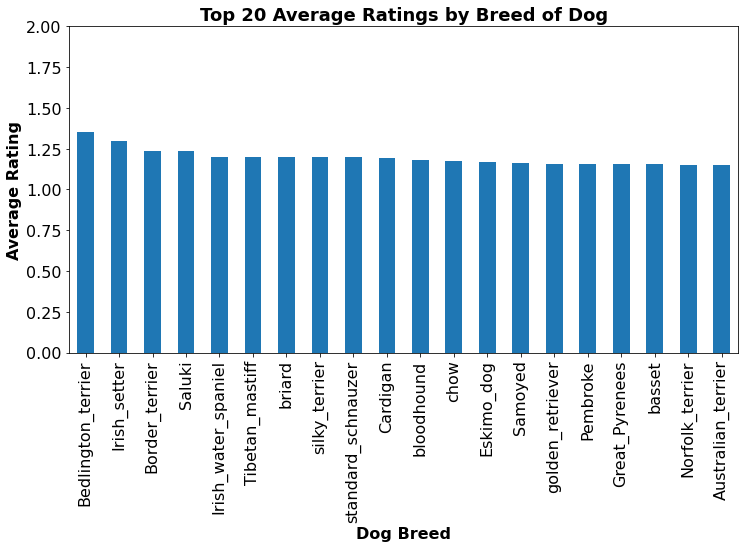

In [194]:
fig = plt.figure(figsize=(12,6))
final_df.groupby('breed_prediction_1')['ratings'].mean().nlargest(20).plot(kind='bar')
plt.title("Top 20 Average Ratings by Breed of Dog",fontsize=18,weight ='bold')
plt.ylabel("Average Rating",fontsize = 16,weight ='bold')
plt.xlabel("Dog Breed",fontsize = 16,weight ='bold')
plt.ylim(0,2);
plt.rcParams.update({'font.size': 16})
plt.show();

Bedlington_terrierhas the highest Average Rating

#### Lowest average ratings by breed of dogs

In [153]:
final_df.groupby('breed_prediction_1')['ratings'].mean().nsmallest(20)

breed_prediction_1
Japanese_spaniel               0.500000
Afghan_hound                   0.800000
Boston_bull                    0.820000
soft-coated_wheaten_terrier    0.820000
Ibizan_hound                   0.850000
Norwich_terrier                0.866667
Walker_hound                   0.875000
Scotch_terrier                 0.900000
basenji                        0.900000
miniature_schnauzer            0.925000
Tibetan_terrier                0.933333
Maltese_dog                    0.937500
Mexican_hairless               0.950000
Scottish_deerhound             0.950000
Welsh_springer_spaniel         0.950000
English_setter                 0.980000
Brabancon_griffon              1.000000
German_short-haired_pointer    1.000000
Saint_Bernard                  1.000000
groenendael                    1.000000
Name: ratings, dtype: float64

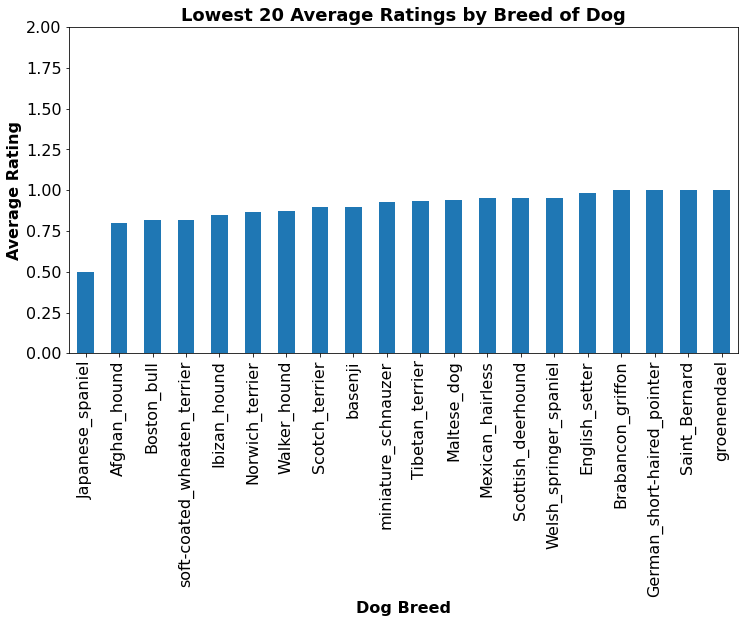

In [195]:
fig = plt.figure(figsize=(12,6))
final_df.groupby('breed_prediction_1')['ratings'].mean().nsmallest(20).plot(kind='bar')
plt.title("Lowest 20 Average Ratings by Breed of Dog",fontsize=18,weight ='bold')
plt.ylabel("Average Rating",fontsize = 16,weight ='bold')
plt.xlabel("Dog Breed",fontsize = 16,weight ='bold')
plt.ylim(0,2);
plt.rcParams.update({'font.size': 16})
plt.show();

Japanese_spaniel dog breed has the lowest average rating

#### Distribution of Dog classes 

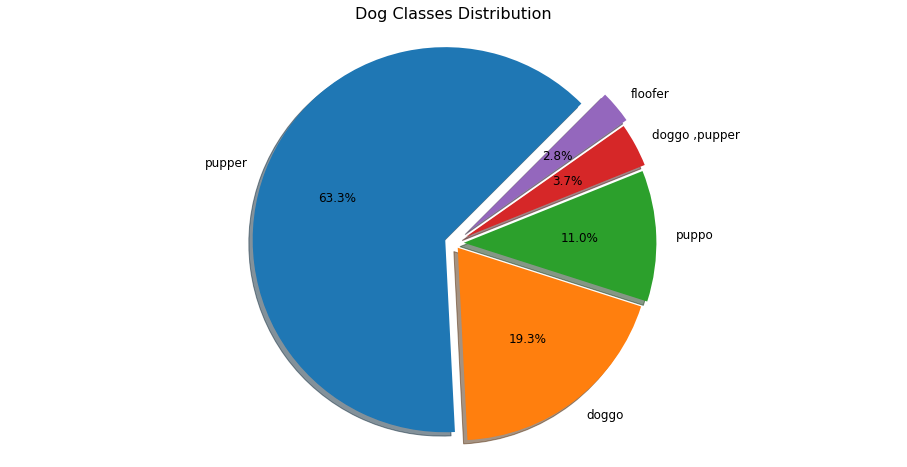

In [190]:
labels = ['pupper','doggo','puppo','doggo ,pupper','floofer']
sizes = final_df.dog_class.value_counts().values
explode=(0.05 ,0.03,0.05,0.07,0.1)

fig1, ax1 = plt.subplots(figsize=(16,8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=45,textprops={'fontsize': 12})
ax1.axis('equal')
plt.title('Dog Classes Distribution',fontsize=16)
plt.show()